# Multilinear Regression

* It's rare that one input explains the output
* We often need more predictors to improve models. 
* Be aware of multicolinearity 

### Maybe Color and Shape can impact the price of a diamond. 

In [1]:
# Libraries

import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

%cd /Users/thomasengland/Dev/Python Analytics/Statistics and Descriptive Analytics/Multilinear Regression

/Users/thomasengland/Dev/Python Analytics/Statistics and Descriptive Analytics/Multilinear Regression


In [2]:
# Load the Data
df = pd.read_csv("salaries.csv")
df.head()


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
# Analyze the data
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


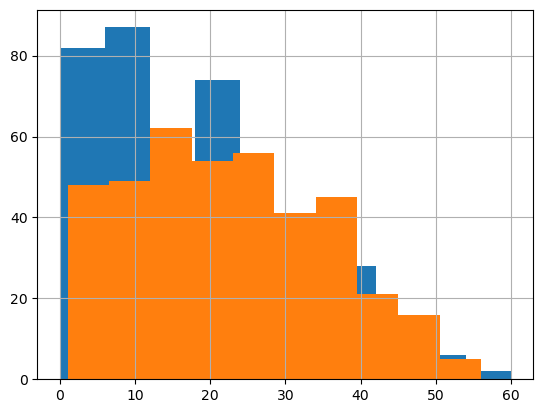

In [4]:
print(df["yrs.service"].hist())
print(df["yrs.since.phd"].hist())

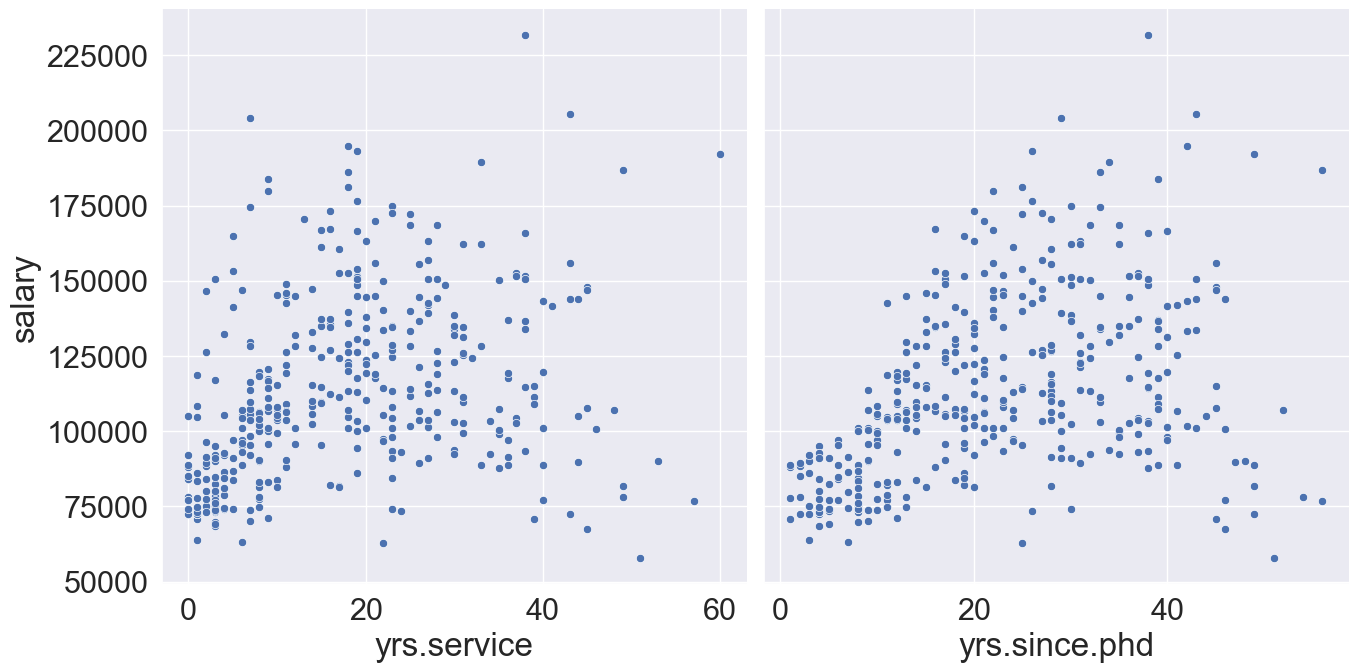

In [5]:
# plotting continuous independent variables against dependent variable
sns.set(font_scale = 2)
sns.pairplot(data=df, y_vars=["salary"], x_vars=["yrs.service", "yrs.since.phd"], height = 7)

<AxesSubplot:>

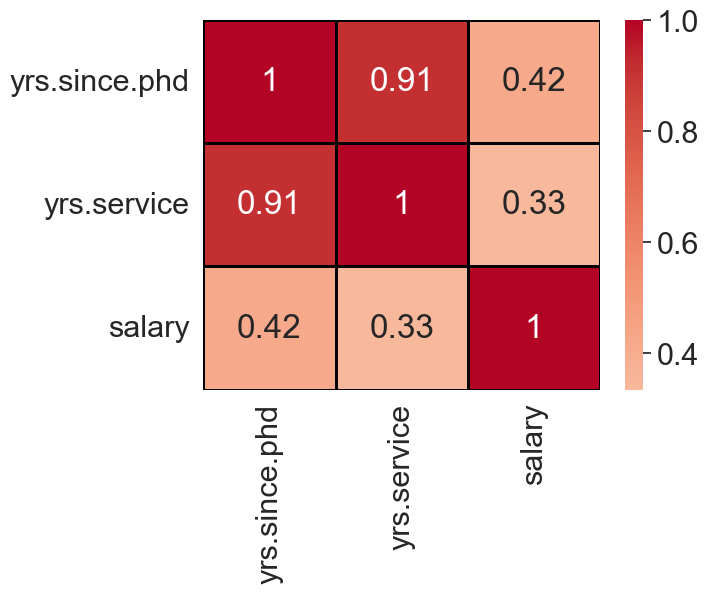

In [7]:
sns.heatmap(df.corr(), annot=True, fmt=".2g", center=0, cmap="coolwarm", linewidths=1, linecolor="black")

In [12]:
#  Tells me that I should probably just use yrs.since.phd since that's the closest correlated to salary. 

# Categorical Variables 

df["rank"].value_counts() 
# Let's collect all categorical variables
df.select_dtypes(include="object").value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

# Loops

In [16]:
# For Loop categorical variables
categorical = list(df.select_dtypes(include="object"))
for cat in categorical:
    print(df[cat].value_counts())


Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


In [17]:
# look at data set
df.head(1)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750


In [18]:
# transform objects into dummies
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1
2,4,3,79750,1,0,1,1
3,45,39,115000,0,1,1,1
4,40,41,141500,0,1,1,1


In [23]:
# isolate X and y
y = df.salary / 1000
X = df.drop(columns=["salary", "yrs.service"])
X.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1


In [24]:
# Add a constant
X = sm.add_constant(X)
X

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1
...,...,...,...,...,...,...
392,1.0,33,0,1,0,1
393,1.0,31,0,1,0,1
394,1.0,42,0,1,0,1
395,1.0,25,0,1,0,1


In [25]:
# Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1502)

X_train.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
260,1.0,41,0,0,0,1
253,1.0,4,1,0,0,0
256,1.0,22,0,1,0,1
267,1.0,14,0,1,0,1
235,1.0,28,0,1,0,1


In [27]:
# Multilinear Regression

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     54.33
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           9.82e-40
Time:                        15:49:53   Log-Likelihood:                -1332.1
No. Observations:                 297   AIC:                             2676.
Df Residuals:                     291   BIC:                             2698.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            79.1284      5.569     14.210